In [0]:
import numpy as np # 
import pandas as pd # data processing
import pandas as pd # to import csv and for data manipulation
import matplotlib.pyplot as plt # to plot graph
import seaborn as sns # for intractve graphs
import numpy as np # for linear algebra
import datetime # to dela with date and time
%matplotlib inline

In [82]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [0]:
df = pd.read_csv(r'creditcard.csv')

In [85]:
#Check any missing/ NaN value
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [86]:
print(df.describe())

                Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]


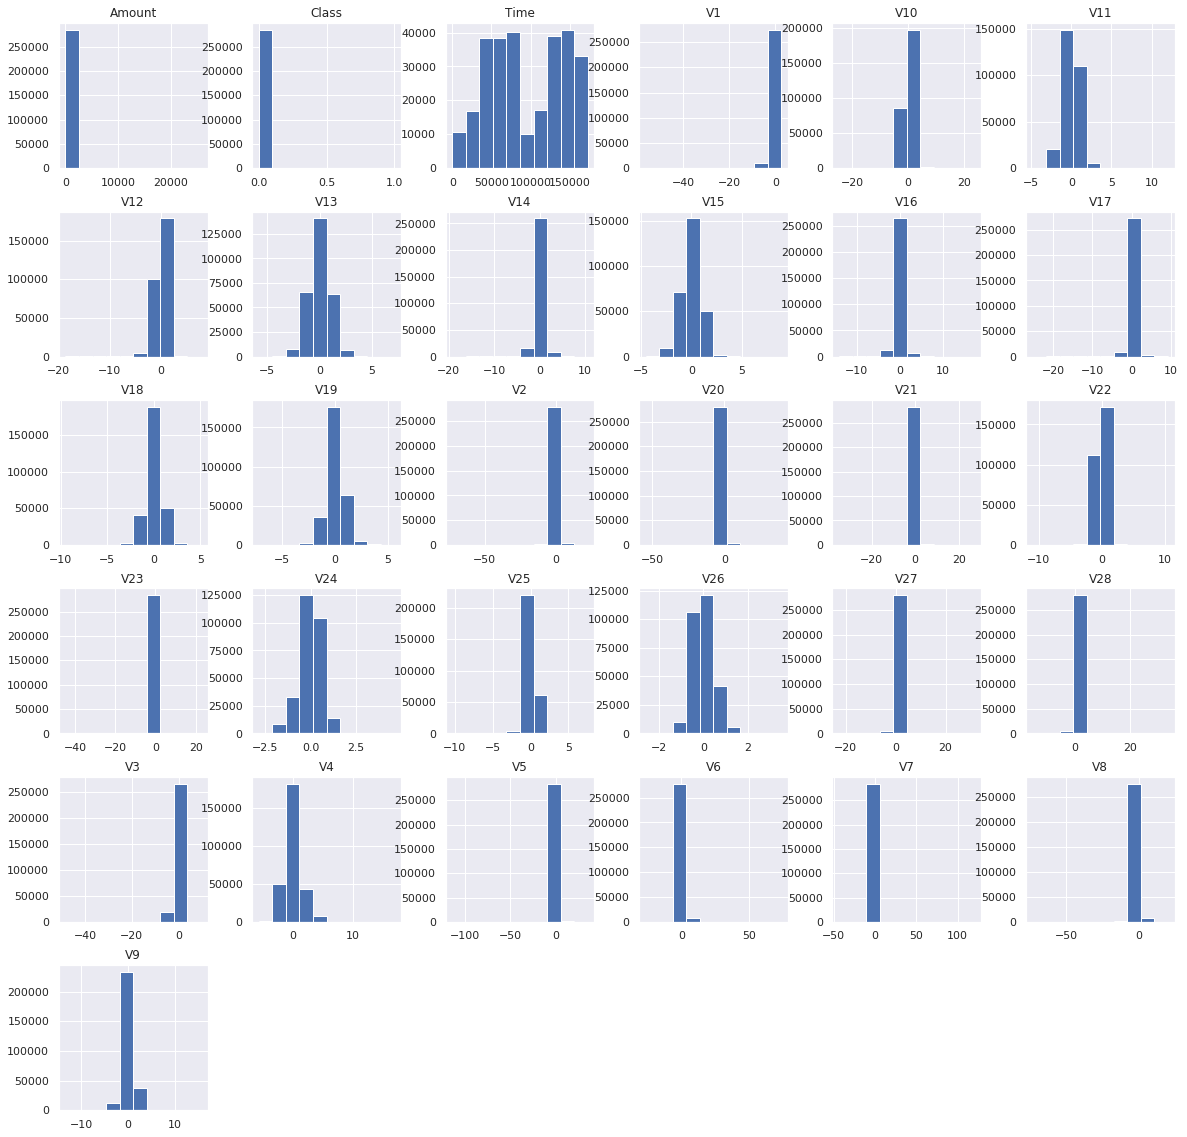

In [87]:
df.hist(figsize=(20,20))
plt.show()

Class
0    284315
1       492
dtype: int64


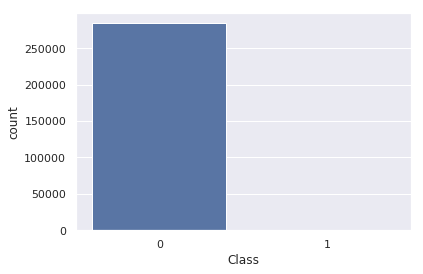

In [88]:
sns.countplot("Class",data=df) 
print(df.groupby('Class').size())

In [89]:
normal_transacation = len(df[df["Class"]==0])/(len(df[df["Class"]==0])+len(df[df["Class"]==1]))
print("Normal Transacation:",normal_transacation*100,"%")
fraud_transacation= len(df[df["Class"]==1])/( len(df[df["Class"]==1]) + len(df[df["Class"]==0]))
print("Fraud transacation:",fraud_transacation*100, '%')

Normal Transacation: 99.82725143693798 %
Fraud transacation: 0.1727485630620034 %


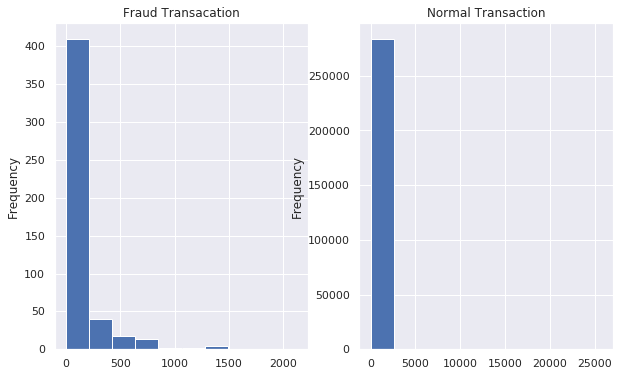

In [90]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
df[df["Class"]==1].Amount.plot.hist(title="Fraud Transacation")
plt.subplot(1,2,2)
df[df["Class"]==0].Amount.plot.hist(title="Normal Transaction")

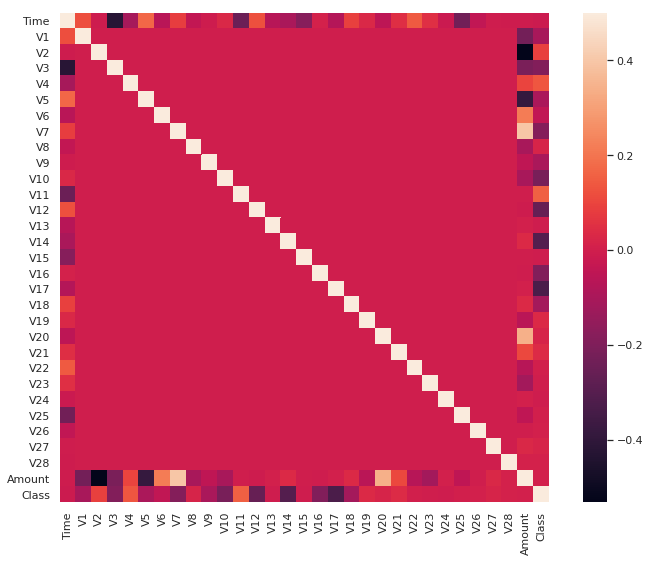

In [91]:
corr = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corr, vmax = 0.5, square = True)

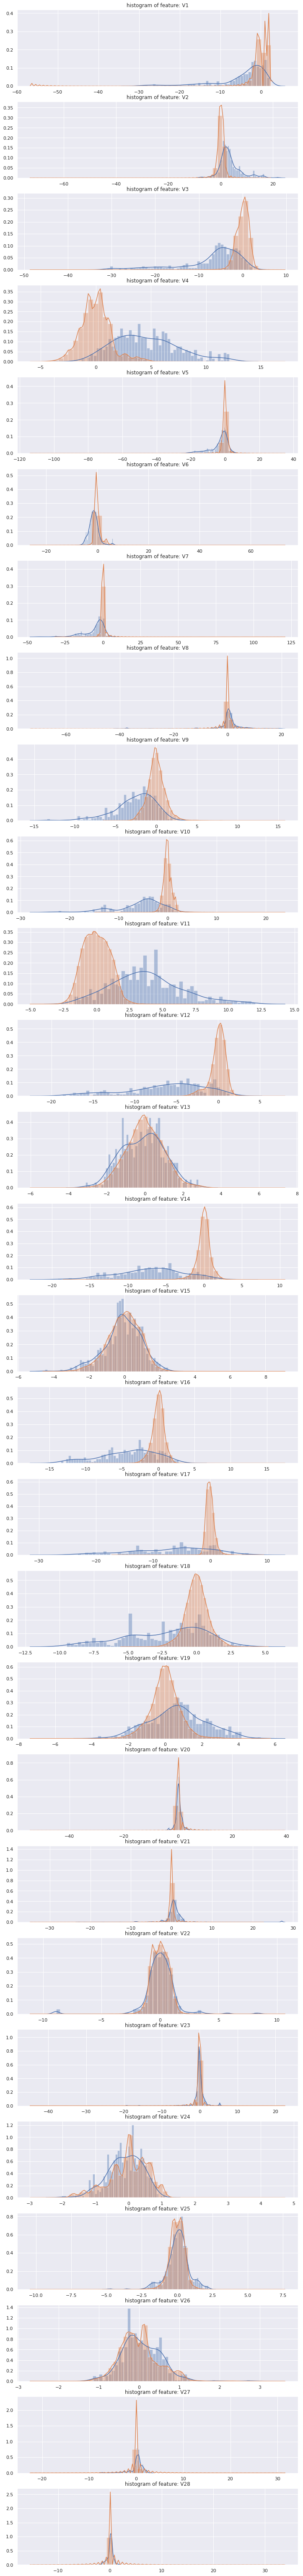

In [92]:
import matplotlib.gridspec as gridspec

v_features = df.iloc[:,1:29].columns

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50,label="Fraud")
    sns.distplot(df[cn][df.Class == 0], bins=50,label="Normal")
    ax.set_xlabel('')
    ax.set_title('histogram of feature: '+cn)
plt.show()

In [93]:
df = df.drop(['Time'], axis =1) 
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [94]:
X = df.iloc[:,df.columns != 'Class']
y = df.iloc[:,df.columns == 'Class']
print(X.shape)
print(y.shape)

(284807, 29)
(284807, 1)


In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [97]:
# import LogisticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# Train the model using 'fit' method
lr.fit(X_train, y_train)

# Test the model using 'predict' method
y_pred = lr.predict(X_test)

# Print the classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85304
           1       0.85      0.63      0.72       139

    accuracy                           1.00     85443
   macro avg       0.92      0.82      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [98]:
# Metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred.round()))

[[85288    16]
 [   51    88]]


In [0]:
from sklearn.ensemble import RandomForestClassifier
# train model
rfc = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
# predict on test set
rfc_pred = rfc.predict(X_test)

In [100]:
print(confusion_matrix(y_test, rfc_pred.round()))

[[85292    12]
 [   33   106]]


In [101]:
#Oversampling can be a good choice when you don’t have a lot of data to work with.

#import resampling 
from sklearn.utils import resample


#Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Class.value_counts()

1    199011
0    199011
Name: Class, dtype: int64

In [0]:
# trying logistic regression again with the balanced dataset
y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)
upsampled_lr = LogisticRegression().fit(X_train, y_train)
upsampled_pred = upsampled_lr.predict(X_test)

In [103]:
print(confusion_matrix(y_test, upsampled_pred.round()))

[[83298  2006]
 [    9   130]]


In [0]:
# trying Random Forest
upsampled_rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
# predict on test set
upsampled_pred_rfc = upsampled_rfc.predict(X_test)

In [105]:
print(confusion_matrix(y_test, upsampled_pred_rfc.round()))

[[85292    12]
 [   36   103]]


In [0]:
from imblearn.over_sampling import SMOTE

In [0]:
# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [0]:
# trying logistic regression again with the balanced dataset
smote_lr = LogisticRegression().fit(X_train, y_train)
smote_pred_lr = smote_lr.predict(X_test)

In [109]:
print(confusion_matrix(y_test, smote_pred_lr.round()))

[[69828  1242]
 [   16   116]]


In [0]:
# trying Random Forest
smote_rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
# predict on test set
smote_pred_rfc = smote_rfc.predict(X_test)

In [111]:
print(confusion_matrix(y_test, smote_pred_rfc.round()))

[[71059    11]
 [   22   110]]
